### Amazon rainforest is the largest forest in the world - and does face forest fires occasionally. This notebooks tries to understand the forest fires in amazon, more from EDA perspective. EDA stands for exploratory data analysis.

In [1]:
#Load the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Load the package - dataset is provided by Kaggle at https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil
data = pd.read_csv('./data/amazon.csv', encoding="ISO-8859-1")

In [2]:
#What are the columns?
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [3]:
#What is the shape of this data ?
data.shape

(6454, 5)

In [4]:
#We have 5 columns and 6454 rows in our data. Let's check more about the data - 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [5]:
#Glad to see that we have no null values in there. Now let's peek into our data
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
#Note that month is not in english! - change all month names into English forms
print( "Before editing : ", data["month"].unique() )
data["month"] = np.where(data["month"] == "Janeiro", "Jan", data["month"])
data["month"] = np.where(data["month"] == "Fevereiro", "Feb", data["month"])
data["month"] = np.where(data["month"] == "Março", "Mar", data["month"])
data["month"] = np.where(data["month"] == "Abril", "Apr", data["month"])
data["month"] = np.where(data["month"] == "Maio", "May", data["month"])
data["month"] = np.where(data["month"] == "Junho", "Jun", data["month"])
data["month"] = np.where(data["month"] == "Julho", "Jul", data["month"])
data["month"] = np.where(data["month"] == "Agosto", "Aug", data["month"])
data["month"] = np.where(data["month"] == "Setembro", "Sep", data["month"])
data["month"] = np.where(data["month"] == "Outubro", "Oct", data["month"])
data["month"] = np.where(data["month"] == "Novembro", "Nov", data["month"])
data["month"] = np.where(data["month"] == "Dezembro", "Dec", data["month"])
print( "After editing : ", data["month"].unique() )

Before editing :  ['Janeiro' 'Fevereiro' 'Março' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']
After editing :  ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


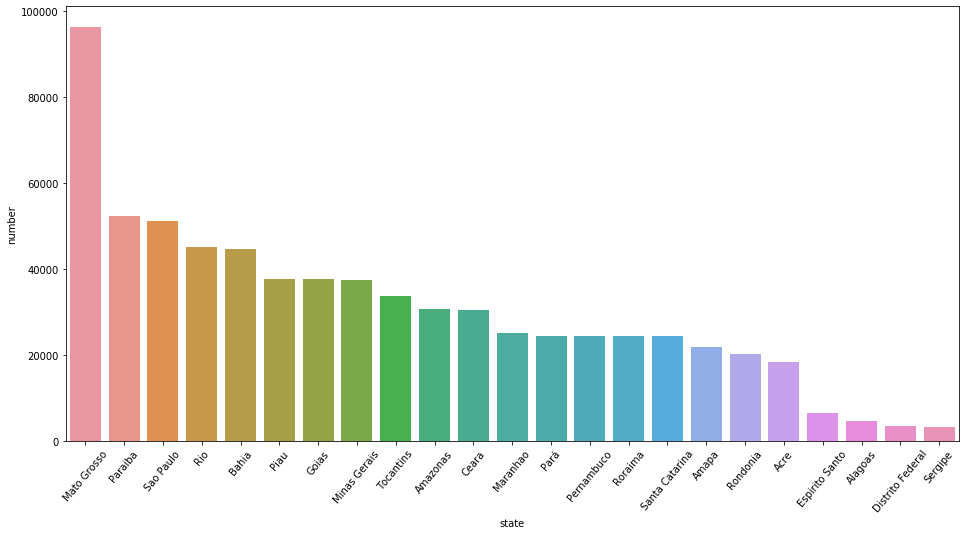

In [7]:
# Which state has the highest number of fires?
fires_by_state = data.groupby("state").agg({"number":"sum"}).sort_values("number", ascending=False).reset_index()
plt.figure(figsize = (16,8))
sns.barplot(x="state", y="number", data = fires_by_state)
plt.xticks(rotation=50)
plt.show()

### Mato Grosso is the state with highest number of forest fires. Hmm...why ? Maybe because it has longest 'border' with amazon forest. Interesting to see that Mato Grosso has unusual high number of forest fires.

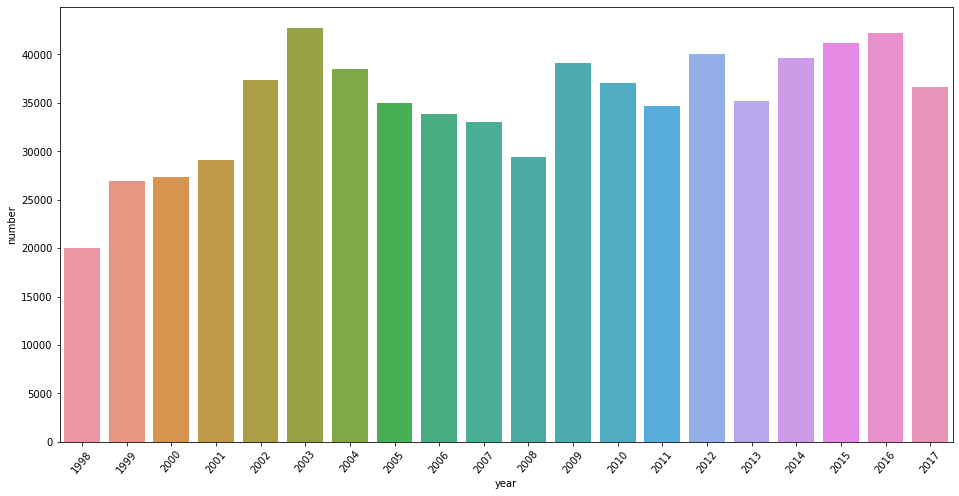

In [8]:
#Which year had most number of forest fires?
fires_by_number = data.groupby("year").agg({"number":"sum"}).reset_index()
plt.figure(figsize = (16,8))
sns.barplot(x="year", y="number", data = fires_by_number)
plt.xticks(rotation=50)
plt.show()

### Year 2003 had most number of forest fires - we also see big rise in number of forest fires since 1998. Could this be global warming? A quick google search does points towards this - https://wwf.panda.org/knowledge_hub/where_we_work/amazon/amazon_threats/climate_change_amazon/. But we need more data to actually find causation.

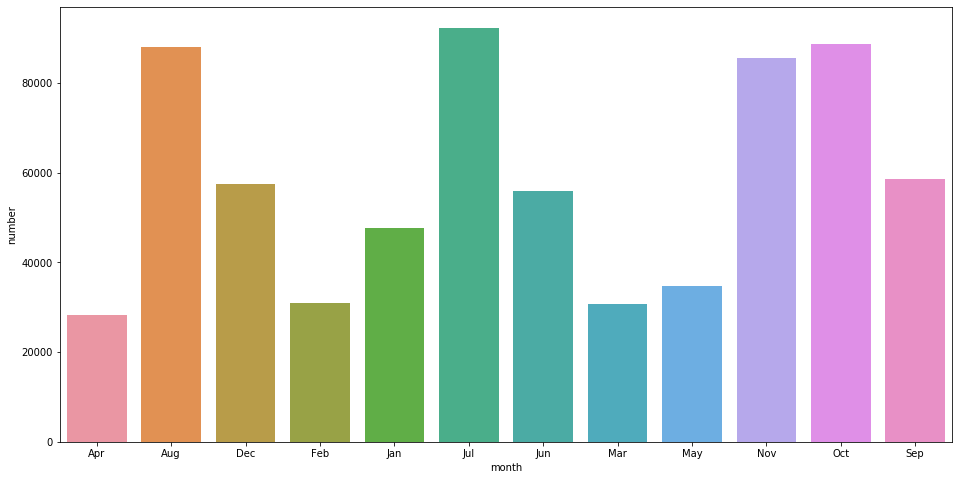

In [9]:
#How about month ? Which month sees high number of fires in general ? One should assume it would be hotter months
fires_by_month = data.groupby("month").agg({"number":"sum"}).reset_index()
plt.figure(figsize = (16,8))
sns.barplot(x="month", y="number", data = fires_by_month)
plt.show()

### July, August, Oct and November have largest number of forest fires. Let's look at Mato Grosso's area and check if it makes sense as compared with all the data.

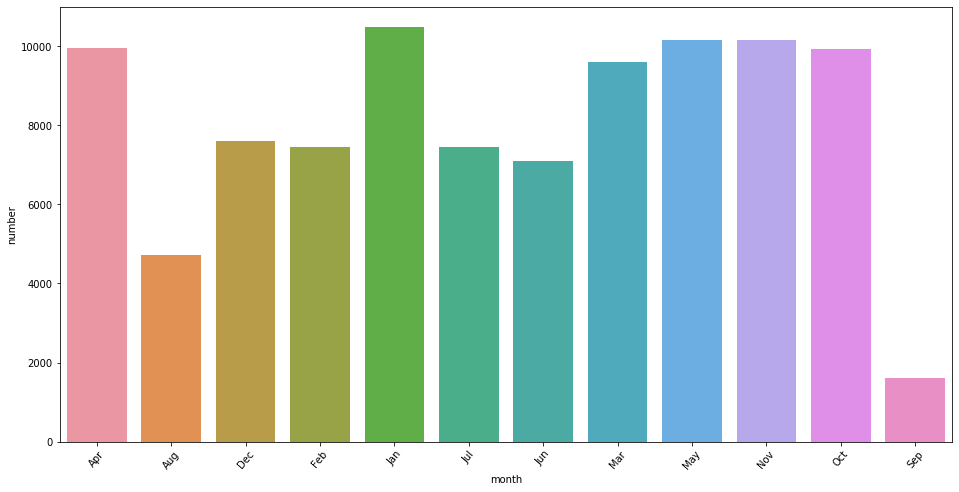

In [10]:
mgData = data[data["state"] == "Mato Grosso"]
fires_by_number = mgData.groupby("month").agg({"number":"sum"}).reset_index()
plt.figure(figsize = (16,8))
sns.barplot(x="month", y="number", data = fires_by_number)
plt.xticks(rotation=50)
plt.show()

#### We see forest fires in Mato Grosso during all the months in year - except two months! And Mato Grosso shares really long border with Amazon forest. Does it mean forest fires occur more at the borders than deep in the forests ? Or does it imply that maybe all forest fires reported are not naturally occuring - rather human made ? 